In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/


In [10]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

noTune = False
MECTune = False

ending = "Jan19"
#ending = "Jan19_noTune"
#ending = "Jan19_MECTune"

In [11]:
if isRun3 == False and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isRun3 == True and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isCombined == True:
    nue_nue_vars_tot_df_run1 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    nue_nue_weights_tot_df_run1 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_vars_tot_run1 = defaultdict(list)
    nue_nue_weights_tot_run1 = defaultdict(list)


    nue_nue_vars_tot_run1 = nue_nue_vars_tot_df_run1.to_dict()
    nue_nue_weights_tot_run1 = nue_nue_weights_tot_df_run1.to_dict()
    nue_nue_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_weights_tot_run1[c][0]) > 2:
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][1:]
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][:-1]
            nue_nue_weights_tot_run1[c][0] = list(map(float,nue_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_vars_tot_run1[c][0]) > 2:
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][1:]
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][:-1]
            nue_nue_vars_tot_run1[c][0] = list(map(float,nue_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run1.pop(i)
        nue_nue_weights_tot_run1.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run1 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    numu_mc_weights_tot_df_run1 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_vars_tot_run1 = defaultdict(list)
    numu_mc_weights_tot_run1= defaultdict(list)


    numu_mc_vars_tot_run1 = numu_mc_vars_tot_df_run1.to_dict()
    numu_mc_weights_tot_run1 = numu_mc_weights_tot_df_run1.to_dict()
    numu_mc_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_weights_tot_run1[c][0]) > 2:
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][1:]
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][:-1]
            numu_mc_weights_tot_run1[c][0] = list(map(float,numu_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_vars_tot_run1[c][0]) > 2:
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][1:]
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][:-1]
            numu_mc_vars_tot_run1[c][0] = list(map(float,numu_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run1.pop(i)
        numu_mc_weights_tot_run1.pop(i)

    ###############################################################
    nue_nue_vars_tot_df_run3 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    nue_nue_weights_tot_df_run3 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_vars_tot_run3 = defaultdict(list)
    nue_nue_weights_tot_run3 = defaultdict(list)


    nue_nue_vars_tot_run3 = nue_nue_vars_tot_df_run3.to_dict()
    nue_nue_weights_tot_run3 = nue_nue_weights_tot_df_run3.to_dict()
    nue_nue_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_weights_tot_run3[c][0]) > 2:
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][1:]
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][:-1]
            nue_nue_weights_tot_run3[c][0] = list(map(float,nue_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_vars_tot_run3[c][0]) > 2:
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][1:]
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][:-1]
            nue_nue_vars_tot_run3[c][0] = list(map(float,nue_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run3.pop(i)
        nue_nue_weights_tot_run3.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run3 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    numu_mc_weights_tot_df_run3 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_vars_tot_run3 = defaultdict(list)
    numu_mc_weights_tot_run3 = defaultdict(list)


    numu_mc_vars_tot_run3 = numu_mc_vars_tot_df_run3.to_dict()
    numu_mc_weights_tot_run3 = numu_mc_weights_tot_df_run3.to_dict()
    numu_mc_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_weights_tot_run3[c][0]) > 2:
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][1:]
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][:-1]
            numu_mc_weights_tot_run3[c][0] = list(map(float,numu_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_vars_tot_run3[c][0]) > 2:
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][1:]
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][:-1]
            numu_mc_vars_tot_run3[c][0] = list(map(float,numu_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run3.pop(i)
        numu_mc_weights_tot_run3.pop(i)

    ###############################################################


In [12]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)

    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)


    ###################################################
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)


    ###################################################
elif isCombined == True:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run1)):
        nue_nue_stat_errs_run1[a] = float(nue_nue_stat_errs_run1[a][0])

    print("nue_nue_stat_errs_run1 = ", nue_nue_stat_errs_run1)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run1)):
        numu_mc_stat_errs_run1[a] = float(numu_mc_stat_errs_run1[a][0])

    print("numu_mc_stat_errs_run1 = ", numu_mc_stat_errs_run1)

    ###################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run3)):
        nue_nue_stat_errs_run3[a] = float(nue_nue_stat_errs_run3[a][0])

    print("nue_nue_stat_errs_run3 = ", nue_nue_stat_errs_run3)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run3)):
        numu_mc_stat_errs_run3[a] = float(numu_mc_stat_errs_run3[a][0])

    print("numu_mc_stat_errs_run3 = ", numu_mc_stat_errs_run3)


    ###################################################

nue_nue_stat_errs_run1 =  [1.511691938814115, 3.1022327304520148, 1.9082219644645197, 0.5440045849671351, 0.17046602373252728, 0.17690572406152566]
numu_mc_stat_errs_run1 =  [543.6672429016196, 418.24862808080184, 317.3788778452594, 165.55864491051173, 50.18937645709269, 46.23193634507655]
nue_nue_stat_errs_run3 =  [6.1562240106251345, 11.727607565036266, 7.873227689245882, 3.336306173693353, 1.7139967091062094, 1.4789493889846037]
numu_mc_stat_errs_run3 =  [2715.323441208115, 3461.7198115373512, 1978.1212107584372, 749.2124863287437, 361.6415964605895, 628.8457204326223]


In [13]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)
    
    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse

    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.zeros([len(n_tot_pair[0]), len(n_tot_pair[1])])
        for n in n_tot_pair:
            for i in range(len(n_tot_pair[0])):
                for j in range(len(n_tot_pair[1])):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [14]:
if isRun3 == False and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isRun3 == True and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isCombined == True:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run1 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run1 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run1 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run1 = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx_run1, nue_nue_final_ncvs_ppfx_run1, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie_run1, nue_nue_final_ncvs_genie_run1, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint_run1, nue_nue_final_ncvs_reint_run1, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo_run1, nue_nue_final_ncvs_geo_run1)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run1 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run1 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run1 = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx_run1, numu_mc_final_ncvs_ppfx_run1, 500)
    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie_run1, numu_mc_final_ncvs_genie_run1, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint_run1, numu_mc_final_ncvs_reint_run1, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo_run1, numu_mc_final_ncvs_geo_run1)
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run3 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run3 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run3 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run3 = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx_run3, nue_nue_final_ncvs_ppfx_run3, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie_run3, nue_nue_final_ncvs_genie_run3, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint_run3, nue_nue_final_ncvs_reint_run3, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo_run3, nue_nue_final_ncvs_geo_run3)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run3 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run3 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run3 = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx_run3, numu_mc_final_ncvs_ppfx_run3, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie_run3, numu_mc_final_ncvs_genie_run3, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint_run3, numu_mc_final_ncvs_reint_run3, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo_run3, numu_mc_final_ncvs_geo_run3)

In [15]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_1"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run1 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run1 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run1 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run1 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run1 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run1 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run1 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run1 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run1 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run1 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run1 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run1 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run1 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run1 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run1 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run1 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run1 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run1 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run3 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run3 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run3 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run3 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run3 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run3 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run3 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run3 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run3 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run3 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run3 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3= numu_mc_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run3 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3= numu_mc_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run3 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run3 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run3 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run3 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run3 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run3 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


## Plot nue

In [16]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot[str(c)][0])) \
            if sum(nue_nue_weights_tot[str(c)][0]) else ""
            for c in nue_nue_vars_tot.keys()
        ]


pup = list(nue_nue_vars_tot.values())

i = 0
for c in nue_nue_vars_tot.keys():
    nue_nue_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot.values())

i = 0
for c in nue_nue_weights_tot.keys():
    nue_nue_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 3])

VARIABLE, BINS, RANGE, XTIT = 'true_e',6,(0.0, 3.0),"True Energy [GeV]"

nue_stacked = nue_ax1.hist(
            nue_nue_vars_tot.values(),
            weights=list(nue_nue_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

n_nue_tot = nue_stacked[0]

plt.title("Nue - True Energies")
plt.xlabel("True Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

NameError: name 'nue_nue_vars_tot' is not defined

In [9]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

#wanted_key = 5

#nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

nue_wanted_list = n_nue_tot
print(nue_wanted_list)

[ 74.815453   188.52032065 103.2625762   36.94806588  14.579105
  16.56542974]


Sidenote for unfolding 

In [10]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[ 74.815453   188.52032065 103.2625762   36.94806588  14.579105
  16.56542974]
434.69095047202893


In [11]:
if isRun3 == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_run3_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

## Now do Numu

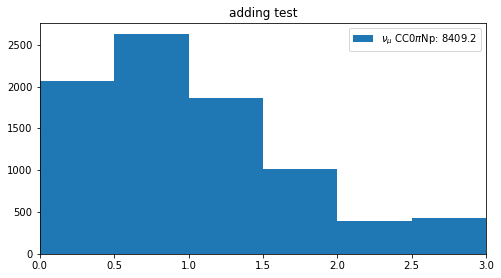

In [12]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot[str(c)][0])) \
            if sum(numu_mc_weights_tot[str(c)][0]) else ""
            for c in numu_mc_vars_tot.keys()
        ]


pup = list(numu_mc_vars_tot.values())

i = 0
for c in numu_mc_vars_tot.keys():
    numu_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot.values())

i = 0
for c in numu_mc_weights_tot.keys():
    numu_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 3])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'true_e',6,(0.0, 3.0),"True Energy [GeV]"

numu_stacked = numu_ax1.hist(
            numu_mc_vars_tot.values(),
            weights=list(numu_mc_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

n_numu_tot = numu_stacked[0]

plt.title("adding test")
plt.legend()

In [13]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


#wanted_key = 4

#numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

numu_wanted_list = n_numu_tot

Sidenote for unfolding 

In [14]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)

[2073.74244887 2628.83713376 1860.12431014 1018.91498672  393.22975949
  434.32193231]


In [15]:
if isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_run3_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')    

## Make a combined plot

[201.2015853  508.52950731 306.34185814 133.68407241  67.26969442
  80.09807182]


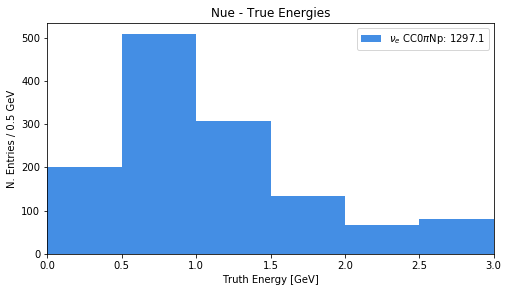

In [17]:
#################
####NUE#########
#################

category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_vars_tot_run1.values())

i = 0
for c in nue_nue_vars_tot_run1.keys():
    nue_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_run1.values())

i = 0
for c in nue_nue_weights_tot_run1.keys():
    nue_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(nue_nue_vars_tot_run3.values())

i = 0
for c in nue_nue_vars_tot_run3.keys():
    nue_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_run3.values())

i = 0
for c in nue_nue_weights_tot_run3.keys():
    nue_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot_run1, nue_nue_vars_tot_run3]
weightss = [nue_nue_weights_tot_run1, nue_nue_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 3])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'true_e',6,(0.0, 3.0),"True Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



#current_total_hist = (nue_stacked[0][-1])


nue_ax1.set_xlim([0, 3])    #TrueE, lepton mom
current_bincenters =  np.arange(0.125, 3.125, 0.5)
current_bin_size = 0.5

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)
n_nue_tot = n_nue_tot


#current_total_hist_comb = (nue_stacked_comb[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - True Energies")
plt.xlabel("Truth Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [18]:
nue_wanted_list = n_nue_tot

In [19]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[201.2015853  508.52950731 306.34185814 133.68407241  67.26969442
  80.09807182]
1297.124789401773


In [20]:
if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == True and MECTune == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True and MECTune == True and noTune == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_MECTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s') 

[5550.34671063 9509.34432692 5860.98762396 2822.75504063 1348.28297558
 2512.30865183]


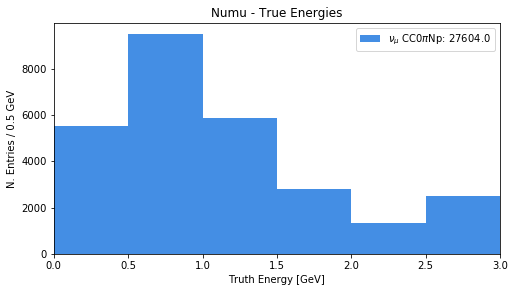

In [21]:
#################
####NUMU#########
#################

category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


########################################
pup = list(numu_mc_vars_tot_run1.values())

i = 0
for c in numu_mc_vars_tot_run1.keys():
    numu_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_run1.values())

i = 0
for c in numu_mc_weights_tot_run1.keys():
    numu_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_vars_tot_run3.values())

i = 0
for c in numu_mc_vars_tot_run3.keys():
    numu_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_run3.values())

i = 0
for c in numu_mc_weights_tot_run3.keys():
    numu_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot_run1, numu_mc_vars_tot_run3]
weightss = [numu_mc_weights_tot_run1, numu_mc_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 3])

labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'true_e',6,(0.0, 3.0),"True Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



#current_total_hist = (nue_stacked[0][-1])


n_numu_tot = (numu_stacked[0])
print(n_numu_tot)
n_numu_tot = n_numu_tot


#current_total_hist_comb = (nue_stacked_comb[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Numu - True Energies")
plt.xlabel("Truth Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [22]:
numu_wanted_list = n_numu_tot

In [23]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)

[5550.34671063 9509.34432692 5860.98762396 2822.75504063 1348.28297558
 2512.30865183]


In [24]:
if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == True and MECTune == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == False and MECTune == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_MECTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')   

## Ratio Plot


bin_ratios:
[0.03625027332411214, 0.053476821305714586, 0.05226795854192629, 0.047359430939293755, 0.049892860506729954, 0.03188225768395546]

[0.1 0.6 1.1 1.6 2.1 2.6]

Making ratio plot.
count,  [0.1 0.6 1.1 1.6 2.1 2.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3. ]
Weights,  [0.03625027332411214, 0.053476821305714586, 0.05226795854192629, 0.047359430939293755, 0.049892860506729954, 0.03188225768395546]



Text(0.5, 1.0, 'Ratio')

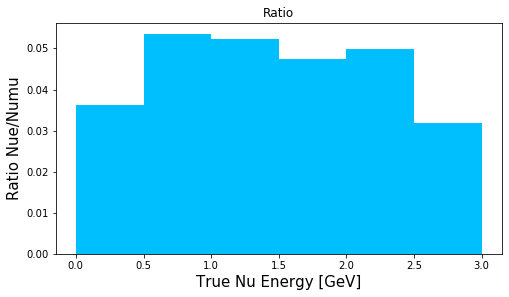

In [25]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

#This comes out of the above plots, be it R1, R3, or Combined
nue_ratio_nums = nue_wanted_list
numu_ratio_nums = numu_wanted_list

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

bins = np.arange(0, 3.5, 0.5)
#count = [1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]
count = np.arange(0.1, 3.0, 0.5)
print(count)
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [26]:
if isCombined == False:
    nue_nue_stat_errs = np.array(nue_nue_stat_errs)

    numu_mc_stat_errs = np.array(numu_mc_stat_errs)
elif isCombined == True:
    nue_nue_stat_errs_run1 = np.array(nue_nue_stat_errs_run1)
    numu_mc_stat_errs_run1 = np.array(numu_mc_stat_errs_run1)
    nue_nue_stat_errs_run3 = np.array(nue_nue_stat_errs_run3)
    numu_mc_stat_errs_run3 = np.array(numu_mc_stat_errs_run3)
    

### Expected Error Calculations

In [27]:
if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs)
    totalstat_nue = nue_nue_stat_errs
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")

    numu_exp_err    = np.sqrt(numu_mc_stat_errs)
    totalstat_numu = numu_mc_stat_errs
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3)
    totalstat_nue = nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    numu_exp_err    = np.sqrt(numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    totalstat_numu = numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)

totalstat_nue  [ 7.66791595 14.8298403   9.78144965  3.88031076  1.88446273  1.65585511]
nue_exp_err  [2.76910021 3.85095317 3.12753092 1.96985044 1.37275735 1.28680034]

totalstat_numu  [3258.99068411 3879.96843962 2295.5000886   914.77113124  411.83097292
  675.07765678]
numu_exp_err  [57.08757031 62.28939267 47.91137744 30.2451836  20.29361902 25.98225658]


In [28]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(ratio_cov)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [29]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs)
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3 )
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))

nue_cov_mc_stat =  [ 7.66791595 14.8298403   9.78144965  3.88031076  1.88446273  1.65585511]
numu_cov_mc_stat =  [3258.99068411 3879.96843962 2295.5000886   914.77113124  411.83097292
  675.07765678]
ratio_cov_mc_stat =  [3.87923221e-07 2.86700640e-07 4.67309097e-07 7.44491149e-07
 1.60057506e-06 3.71066255e-07]


In [30]:
#0.6% fractional value being added for nue
#3.2% fractional value being added for numu
#2.4% fractional value being added for ratio

#############################

#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###########################

nue_detsys_errs = (0.006*0.006)*(n_nue_tot*n_nue_tot)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.032*0.032)*(n_numu_tot*n_numu_tot)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################

ratio_detsys_errs = (0.024*0.024)*(np.array(rbin_ratios)*np.array(rbin_ratios))
ratio_cov_mc_detsys[np.diag_indices_from(ratio_cov_mc_detsys)]   = (ratio_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("ratio_cov_mc_detsys = ", np.diag(ratio_cov_mc_detsys))

ratio_detsys_exp_err = np.sqrt(np.diag(ratio_cov_mc_detsys))
ratio_detsys_frac_err = ratio_detsys_exp_err/rbin_ratios
print("totalstat_ratio_detsys ", ratio_detsys_errs )
print("ratio_detsys_exp_err ", ratio_detsys_exp_err)
print("ratio_detsys_frac_err ", ratio_detsys_frac_err)
print("")

#######################################################

nue_cov_mc_detsys =  [1.45735481 9.30968135 3.37843203 0.64337152 0.16290762 0.23096524]
totalstat_nue_detsys  [1.45735481 9.30968135 3.37843203 0.64337152 0.16290762 0.23096524]
nue_detsys_exp_err  [1.20720951 3.05117704 1.83805115 0.80210443 0.40361817 0.48058843]
nue_detsys_frac_err  [0.006 0.006 0.006 0.006 0.006 0.006]

numu_cov_mc_detsys =  [31545.70097478 92597.89263658 35175.60415043  8159.17672389
  1861.49578982  6463.17543634]
totalstat_numu_detsys  [31545.70097478 92597.89263658 35175.60415043  8159.17672389
  1861.49578982  6463.17543634]
numu_detsys_exp_err  [177.61109474 304.29901846 187.55160397  90.3281613   43.14505522
  80.39387686]
numu_detsys_frac_err  [0.032 0.032 0.032 0.032 0.032 0.032]

ratio_cov_mc_detsys =  [7.56911414e-07 1.64722776e-06 1.57359715e-06 1.29191944e-06
 1.43383538e-06 5.85491532e-07]
totalstat_ratio_detsys  [7.56911414e-07 1.64722776e-06 1.57359715e-06 1.29191944e-06
 1.43383538e-06 5.85491532e-07]
ratio_detsys_exp_err  [0.00087001 0.00128344 0

### Now need the systematic errors

In [31]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3 )
    numu_cov += (cov_numu_mc_geo_run1 + cov_numu_mc_geo_run3)

In [32]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))

print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print("")
print("numu_frac_err ", numu_frac_err)


nue_exp_err  [36.76578058 77.67720644 48.49320343 20.93831101 12.10927114 16.0327017 ]

nue_frac_err  [0.18273107 0.15274867 0.15829767 0.15662532 0.18001079 0.20016339]

numu_exp_err  [ 932.50510059 1588.59978376  932.30488425  436.23271372  215.63875756
  514.12375465]

numu_frac_err  [0.16800844 0.16705671 0.15906959 0.15454147 0.15993583 0.20464196]


In [33]:
total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

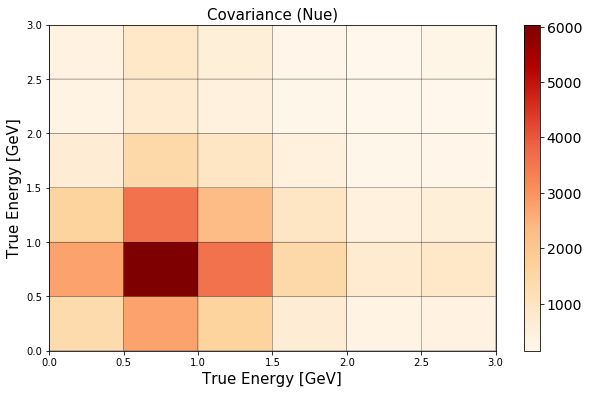

In [25]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Covariance (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cov_"+ending+".svg", bbox_inches='tight')

plt.show()

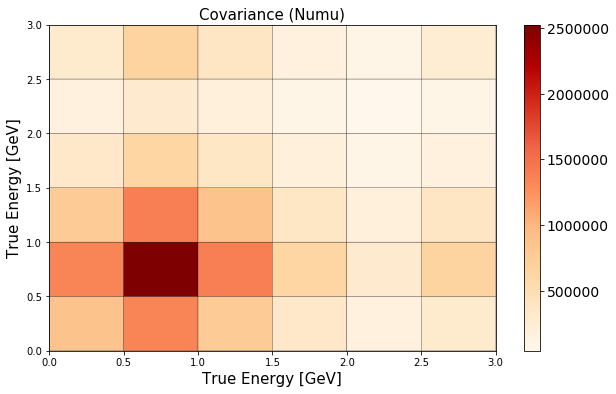

In [26]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Covariance (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cov_"+ending+".svg", bbox_inches='tight')

plt.show()

In [27]:
nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot[i]*n_nue_tot[j] != 0:
            nue_frac_cov[i][j] += c/(n_nue_tot[i]*n_nue_tot[j])
            
print(nue_frac_cov)
print("")
print(np.sqrt(np.diag(nue_frac_cov)))
print("")

############################################

numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot[i]*n_numu_tot[j] != 0:
            numu_frac_cov[i][j] += c/(n_numu_tot[i]*n_numu_tot[j])

print("")
print(numu_frac_cov)
print("")
print(np.sqrt(np.diag(numu_frac_cov)))

[[0.033390643231112974, 0.026948505879089424, 0.026595508163397716, 0.023855398862882057, 0.025325734565008043, 0.02521860947021778], [0.026948505879089424, 0.023332156513254456, 0.023047122251180545, 0.021042399079110995, 0.0215596816438335, 0.021707325490808452], [0.026595508163397716, 0.023047122251180545, 0.025058153427211665, 0.02365704888619817, 0.022029136277291885, 0.022043354838893383], [0.023855398862882057, 0.021042399079110995, 0.02365704888619817, 0.024531491771163302, 0.02200199117333068, 0.02212186042617893], [0.025325734565008043, 0.0215596816438335, 0.022029136277291885, 0.02200199117333068, 0.03240388612622102, 0.02929406114957294], [0.02521860947021778, 0.021707325490808452, 0.022043354838893383, 0.02212186042617893, 0.02929406114957294, 0.040065383262348625]]

[0.18273107 0.15274867 0.15829767 0.15662532 0.18001079 0.20016339]


[[0.02822683641253732, 0.0257236556216078, 0.02377223575831581, 0.022595505685540695, 0.02195826429609937, 0.023353311653383384], [0.025723

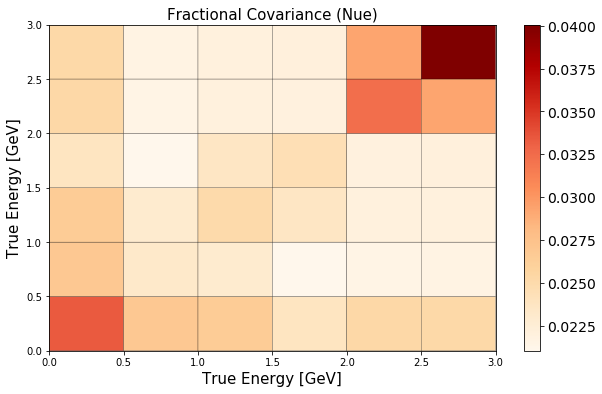

In [28]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Fractional Covariance (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_FracCov_"+ending+".svg", bbox_inches='tight')

plt.show()

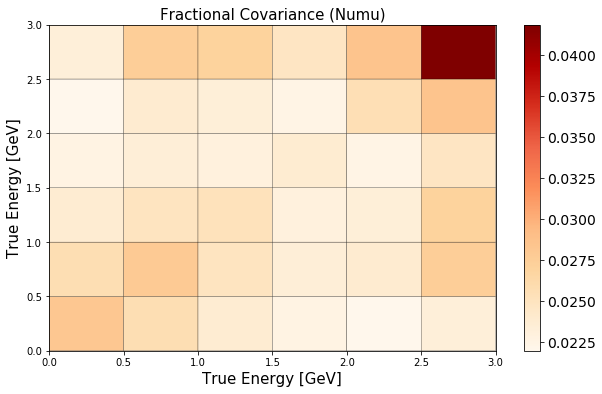

In [29]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Fractional Covariance (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_FracCov_"+ending+".svg", bbox_inches='tight')

plt.show()

In [30]:
##########################
nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_nue_cov)): 
    for j in range(len(total_nue_cov[i])): 

        if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
            nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
            
##########################
numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_numu_cov)): 
    for j in range(len(total_numu_cov[i])): 

        if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
            numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))            

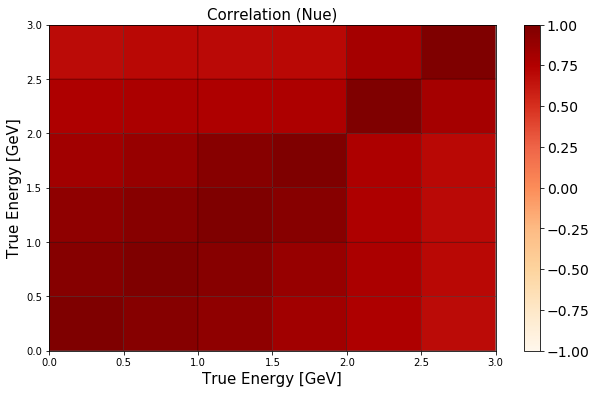

In [31]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Correlation (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cor_"+ending+".svg", bbox_inches='tight')

plt.show()

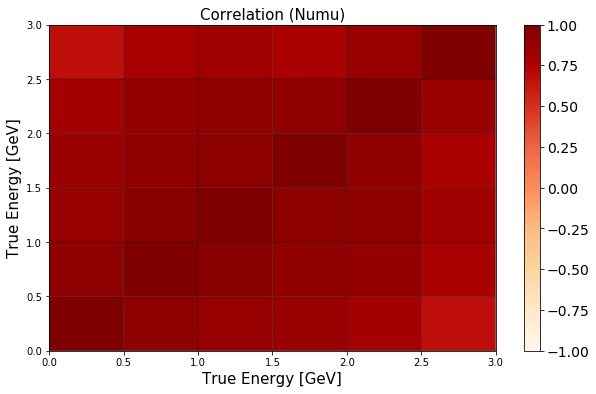

In [32]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Correlation (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cor_"+ending+".svg", bbox_inches='tight')

plt.show()

### Ratio Sys Errors

In [33]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
#This will come from plots, so irrelevant if from R1, R3, or Combined
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list

rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 6
x_range = (0.0, 3.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_ppfx
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_ppfx_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_ppfx
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_ppfx_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSplineTimesTuneTimesPPFX"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_ppfx_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_ppfx_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_ppfx_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_ppfx_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_ppfx_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_ppfx_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_ppfx_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_ppfx_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_ppfx_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_ppfx_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_ppfx_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_ppfx_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys             

        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[5.03055547e-06 6.09864897e-06 3.52253217e-06 1.03950889e-06
  8.08549944e-07 2.64482837e-07]
 [6.09864897e-06 9.02357355e-06 5.97623350e-06 1.86745090e-06
  1.13505012e-06 1.37182759e-06]
 [3.52253217e-06 5.97623350e-06 4.63021522e-06 1.73083336e-06
  1.23716165e-06 1.53527372e-06]
 [1.03950889e-06 1.86745090e-06 1.73083336e-06 2.05303687e-06
  2.14837918e-06 6.68711473e-07]
 [8.08549944e-07 1.13505012e-06 1.23716165e-06 2.14837918e-06
  3.81812452e-06 5.85515442e-07]
 [2.64482837e-07 1.37182759e-06 1.53527372e-06 6.68711473e-07
  5.85515442e-07 1.17686139e-06]]
--------------------------------------------------



In [34]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins =6
x_range = (0.0, 3.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_genie
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_genie_vars.squeeze()
    #variable_nue = variable_nue["nu_e"] 
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()
    #print(spline_fix_var_nue)
    #spline_fix_var_nue = spline_fix_var_nue["weightSpline"]

    ##Numu
    s_m = numu_mc_df_genie
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_genie_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSpline"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_genie_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_genie_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_genie_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_genie_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_genie_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_genie_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_genie_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_genie_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_genie_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_genie_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_genie_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_genie_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 1.79189308e-06 -7.37944392e-07 -3.24679646e-07 -5.28870201e-07
   9.08856488e-07 -8.46333358e-07]
 [-7.37944392e-07  1.29270988e-06  2.79345392e-07  7.50839253e-07
  -7.95069174e-07  7.14358743e-07]
 [-3.24679646e-07  2.79345392e-07  1.09916524e-07  1.70521242e-07
  -2.46948083e-07  2.26138963e-07]
 [-5.28870201e-07  7.50839253e-07  1.70521242e-07  4.87451757e-07
  -4.95452763e-07  4.34985925e-07]
 [ 9.08856488e-07 -7.95069174e-07 -2.46948083e-07 -4.95452763e-07
   7.64978188e-07 -6.02302301e-07]
 [-8.46333358e-07  7.14358743e-07  2.26138963e-07  4.34985925e-07
  -6.02302301e-07  6.07366166e-07]]
--------------------------------------------------



In [35]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 6
x_range = (0.0, 3.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_reint
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_reint_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_reint
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_reint_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_reint_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_reint_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_reint_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_reint_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_reint_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_reint_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_reint_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_reint_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_reint_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_reint_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_reint_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_reint_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 3.09856380e-09 -4.61203835e-10 -7.58353081e-09 -9.54772781e-10
  -1.28456445e-08 -9.56975902e-09]
 [-4.61203835e-10  7.89650512e-10  1.33941789e-09 -1.06784821e-09
  -6.02510158e-10  2.20158553e-09]
 [-7.58353081e-09  1.33941789e-09  2.03295331e-08  2.68264288e-09
   3.28099313e-08  2.46960360e-08]
 [-9.54772781e-10 -1.06784821e-09  2.68264288e-09  4.89822310e-09
   1.16967744e-08  3.63528670e-10]
 [-1.28456445e-08 -6.02510158e-10  3.28099313e-08  1.16967744e-08
   6.87300672e-08  3.52932320e-08]
 [-9.56975902e-09  2.20158553e-09  2.46960360e-08  3.63528670e-10
   3.52932320e-08  3.41397546e-08]]
--------------------------------------------------



In [36]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 6
x_range = (0.0, 3.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    cov_ratio_geo = False
    
    ##Nue
    s_n = nue_nue_df_geo
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_geo_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()


    ##Numu
    s_m = numu_mc_df_geo
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_geo_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if (not df_n.empty) and (not df_m.empty):
            for i in range(2):
                weight_n = df_n[i+variationNumber].values
                weight_n[np.isnan(weight_n)] = 1
                weight_n[weight_n > 100] = 1
                weight_n[weight_n < 0] = 1
                weight_n[weight_n == np.inf] = 1
                weight_m = df_m[i+variationNumber].values
                weight_m[np.isnan(weight_m)] = 1
                weight_m[weight_m > 100] = 1
                weight_m[weight_m < 0] = 1
                weight_m[weight_m == np.inf] = 1
                n_n, bins = np.histogram(
                    variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
                n_m, bins = np.histogram(
                    variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

                rbin_ratios_sys = []

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys

                
    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0 or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov         

elif isCombined == True:
    
    cov_ratio_geo = False
    
    ##Nue
    s_n_run1 = nue_nue_df_geo_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_geo_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_geo_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_geo_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_geo_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_geo_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_geo_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_geo_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_geo_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_geo_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_geo_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_geo_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
            for i in range(2):
                weight_n_run1 = df_n_run1[i+variationNumber].values    ###
                weight_n_run1[np.isnan(weight_n_run1)] = 1
                weight_n_run1[weight_n_run1 > 100] = 1
                weight_n_run1[weight_n_run1 < 0] = 1
                weight_n_run1[weight_n_run1 == np.inf] = 1
                weight_n_run3 = df_n_run3[i+variationNumber].values    ###
                weight_n_run3[np.isnan(weight_n_run3)] = 1
                weight_n_run3[weight_n_run3 > 100] = 1
                weight_n_run3[weight_n_run3 < 0] = 1
                weight_n_run3[weight_n_run3 == np.inf] = 1
                weight_m_run1 = df_m_run1[i+variationNumber].values    ###
                weight_m_run1[np.isnan(weight_m_run1)] = 1
                weight_m_run1[weight_m_run1 > 100] = 1
                weight_m_run1[weight_m_run1 < 0] = 1
                weight_m_run1[weight_m_run1 == np.inf] = 1
                weight_m_run3 = df_m_run3[i+variationNumber].values    ###
                weight_m_run3[np.isnan(weight_m_run3)] = 1
                weight_m_run3[weight_m_run3 > 100] = 1
                weight_m_run3[weight_m_run3 < 0] = 1
                weight_m_run3[weight_m_run3 == np.inf] = 1
                n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
                n_n_run3, bins = np.histogram(
                    variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
                n_m_run1, bins = np.histogram(
                    variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
                n_m_run3, bins = np.histogram(
                    variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)

                rbin_ratios_sys = []
                
                n_n = n_n_run1 + n_n_run3
                n_m = n_m_run1 + n_m_run3

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys
    

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if (variationNumber == 0) or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 5.23272863e-08  1.24596320e-07 -2.25513525e-07 -2.39045461e-07
  -8.40833666e-08  3.48536447e-07]
 [ 1.24596320e-07  3.61210708e-07 -4.71284923e-07 -5.25999263e-07
  -3.03714136e-07  1.10133182e-06]
 [-2.25513525e-07 -4.71284923e-07  1.03874443e-06  1.07416843e-06
   2.57024398e-07 -1.22580978e-06]
 [-2.39045461e-07 -5.25999263e-07  1.07416843e-06  1.12093188e-06
   3.14844471e-07 -1.41054938e-06]
 [-8.40833666e-08 -3.03714136e-07  2.57024398e-07  3.14844471e-07
   3.01114422e-07 -9.95388999e-07]
 [ 3.48536447e-07  1.10133182e-06 -1.22580978e-06 -1.41054938e-06
  -9.95388999e-07  3.46314133e-06]]
--------------------------------------------------



In [37]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[ 6.87787440e-06  5.48483970e-06  2.96475547e-06  2.70638454e-07
   1.62047742e-06 -2.42883834e-07]
 [ 5.48483970e-06  1.06782838e-05  5.78563338e-06  2.09122304e-06
   3.56642947e-08  3.18971974e-06]
 [ 2.96475547e-06  5.78563338e-06  5.79920571e-06  2.97820567e-06
   1.28004790e-06  5.60298938e-07]
 [ 2.70638454e-07  2.09122304e-06  2.97820567e-06  3.66631873e-06
   1.97946767e-06 -3.06488453e-07]
 [ 1.62047742e-06  3.56642947e-08  1.28004790e-06  1.97946767e-06
   4.95294719e-06 -9.76882626e-07]
 [-2.42883834e-07  3.18971974e-06  5.60298938e-07 -3.06488453e-07
  -9.76882626e-07  5.28150864e-06]]


In [38]:
total_cov = ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys

##########################

ratio_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_cov[i][j]
        
        if rbin_ratios[i]*rbin_ratios[j] != 0:
            ratio_frac_cov[i][j] = c/(rbin_ratios[i]*rbin_ratios[j])
            
print(ratio_frac_cov)
print("")

##########################
ratio_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 

        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            ratio_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))

[[0.006105179966739335, 0.0028293525703739554, 0.0015647395345167198, 0.00015764193005548757, 0.0008959696417172182, -0.00021015428822911968], [0.0028293525703739554, 0.004410218429275603, 0.0020699020174842825, 0.0008257114292188002, 1.3366867752442896e-05, 0.0018708452836529326], [0.0015647395345167198, 0.0020699020174842825, 0.002869797072868897, 0.0012031303247227359, 0.0004908539367467177, 0.0003362290189327943], [0.00015764193005548757, 0.0008257114292188002, 0.0012031303247227359, 0.0025425517866691726, 0.0008377289670864846, -0.00020298248932700338], [0.0008959696417172182, 1.3366867752442896e-05, 0.0004908539367467177, 0.0008377289670864846, 0.0032086793710830643, -0.000614122365660975], [-0.00021015428822911968, 0.0018708452836529326, 0.0003362290189327943, -0.00020298248932700338, -0.000614122365660975, 0.006136939750764901]]



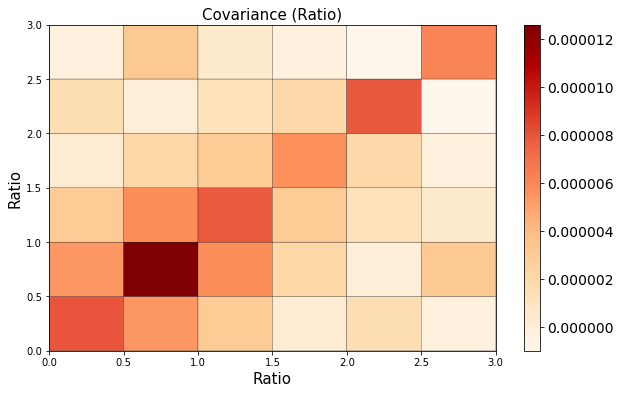

In [39]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Covariance (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_Cov_"+ending+".svg", bbox_inches='tight')

plt.show()

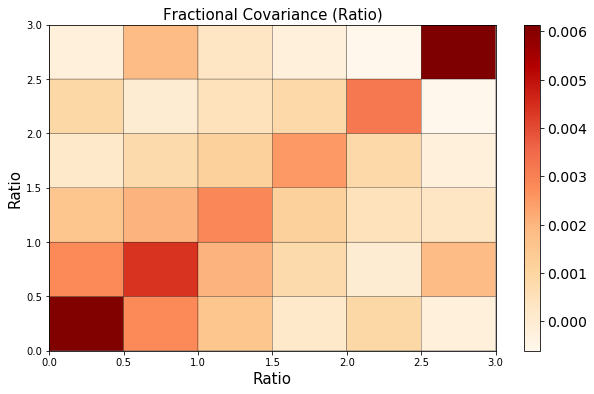

In [40]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Fractional Covariance (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_FracCov_"+ending+".svg", bbox_inches='tight')

plt.show()

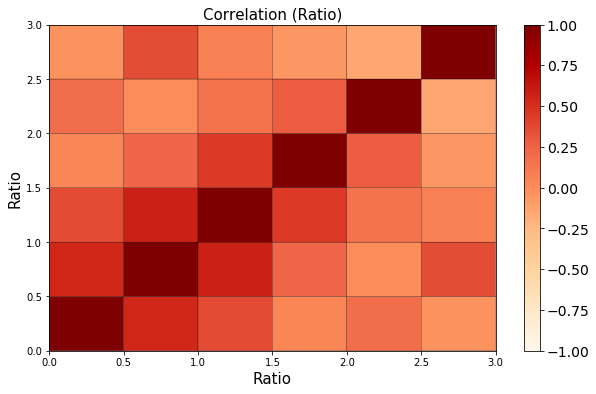

In [41]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Correlation (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_Cor_"+ending+".svg", bbox_inches='tight')

plt.show()

In [42]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("")
print("ratio_cov_mc_stat ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))
print("")
print("np.diag ", np.nan_to_num(np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys))))
print("")
print("ratio_exp_err ", np.nan_to_num(ratio_exp_err))

ratio_cov  [6.87787440e-06 1.06782838e-05 5.79920571e-06 3.66631873e-06
 4.95294719e-06 5.28150864e-06]

ratio_cov_mc_stat  [3.87923221e-07 2.86700640e-07 4.67309097e-07 7.44491149e-07
 1.60057506e-06 3.71066255e-07]

np.diag  [8.02270903e-06 1.26122122e-05 7.84011195e-06 5.70272932e-06
 7.98735763e-06 6.23806642e-06]

ratio_exp_err  [0.00283244 0.00355137 0.00280002 0.00238804 0.00282619 0.00249761]


[0.07234622 0.06110618 0.04607324 0.04043046 0.04460602 0.07208251]


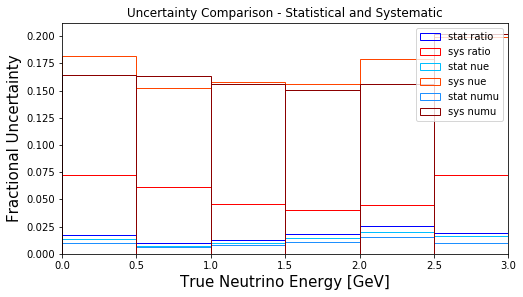

In [43]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 3.5, 0.5)
#count = [1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]
count = np.arange(0.1, 3.0, 0.5)


nue_stat_weights = np.nan_to_num(np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list)
nue_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(nue_cov)))/nue_wanted_list)
numu_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov_mc_stat)))/numu_wanted_list)
numu_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov)))/numu_wanted_list)
ratio_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov_mc_stat)))/rbin_ratios)
ratio_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov)))/rbin_ratios)

print(ratio_sys_weights)

sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('True Neutrino Energy [GeV]', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Statistical and Systematic")
errors_r_ax1.set_xlim([0, 3])
#errors_r_ax1.set_ylim([0, 100])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [44]:
if isRun3 == False and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent_run3_"+ending+".pdf")
elif isCombined == True:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent_comb_"+ending+".svg",bbox_inches='tight')    
       

In [45]:
ratio_bins = np.arange(0, 3.5, 0.5)
ratio_bincenters = np.arange(0.25, 3.25, 0.5)
ratio_bin_edges = np.arange(0, 3.5, 0.5)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_ratios

print(ratio_n_tot)
print("")
print("error")
print(np.nan_to_num(ratio_exp_err))
print("")
ratio_frac_err = np.nan_to_num(ratio_exp_err / ratio_n_tot)
print(ratio_frac_err)
lower_err = np.nan_to_num(ratio_n_tot-ratio_exp_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([0, 3])

[0.03625027332411214, 0.053476821305714586, 0.05226795854192629, 0.047359430939293755, 0.049892860506729954, 0.03188225768395546]

error
[0.00283244 0.00355137 0.00280002 0.00238804 0.00282619 0.00249761]

[0.07813565 0.06640948 0.05357049 0.05042372 0.05664521 0.07833862]


(0, 3)

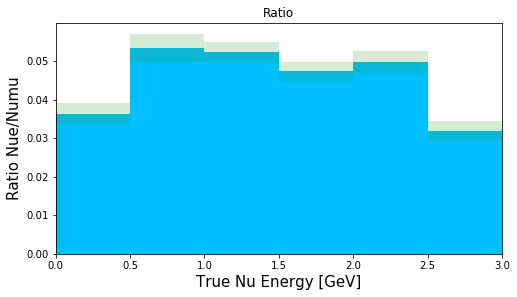

In [46]:
ratio_fig


In [47]:
if isRun3 == False and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight')    

In [34]:
nue_bin_edges = np.arange(0, 3.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print(nue_frac_err)
lower_err = np.nan_to_num(n_nue_tot-nue_exp_err)

nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot-nue_exp_err))

[0.18273107 0.15274867 0.15829767 0.15662532 0.18001079 0.20016339]


<BarContainer object of 6 artists>

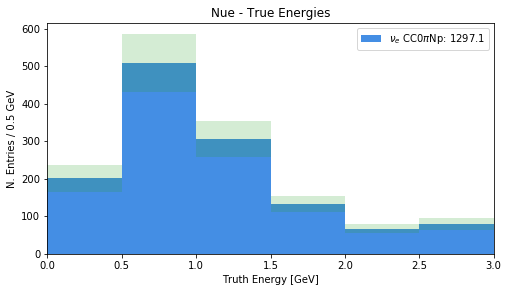

In [35]:
nue_fig

In [36]:
if isRun3 == False and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight')    

In [29]:
numu_bin_edges = np.arange(0, 3.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print(numu_frac_err)
lower_err = np.nan_to_num(n_numu_tot-numu_exp_err)

numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

[0.16800844 0.16705671 0.15906959 0.15454147 0.15993583 0.20464196]


<BarContainer object of 6 artists>

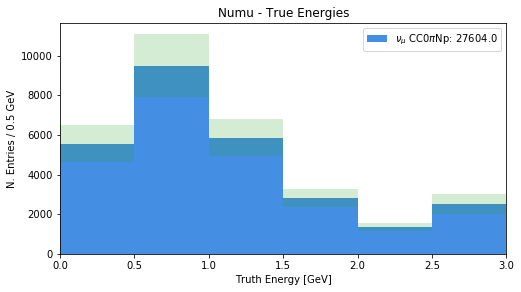

In [30]:
numu_fig

In [31]:
if isRun3 == False and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight' )    

(0, 3)

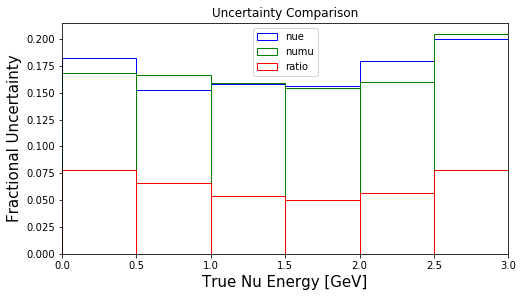

In [80]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 3.5, 0.5)
#count = [1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]
count = np.arange(0.1, 3.0, 0.5)


sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
errors_ax1.set_xlim([0, 3])
#errors_ax1.set_ylim([0, 1])

In [81]:
if isRun3 == False and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight')   

## For Blockwise Unfolding

In [16]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [ 74.815453   188.52032065 103.2625762   36.94806588  14.579105
  16.56542974]


In [17]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [2073.74244887 2628.83713376 1860.12431014 1018.91498672  393.22975949
  434.32193231]


In [18]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[  74.815453    188.52032065  103.2625762    36.94806588   14.579105
   16.56542974 2073.74244887 2628.83713376 1860.12431014 1018.91498672
  393.22975949  434.32193231]
12


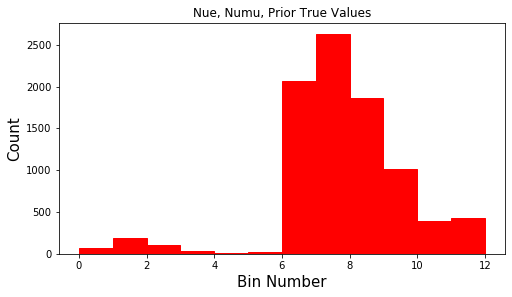

In [19]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Prior True Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("prior_true_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [20]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    
